In [1]:
from sklearn import datasets
boston = datasets.load_boston()

In [18]:
X = boston.data
y = boston.target

#### K-fold cross validation

학습 데이터를 K번 나눠서 Test와 Train을 실시 -> Test의 평균값을 사용

In [5]:
from sklearn.model_selection import KFold

kf = KFold(n_splits=10, shuffle=True)

for train_index, test_index in kf.split(X):
    print("TRAIN - ", len(train_index))
    print("TEST - ",  len(test_index))    

TRAIN -  455
TEST -  51
TRAIN -  455
TEST -  51
TRAIN -  455
TEST -  51
TRAIN -  455
TEST -  51
TRAIN -  455
TEST -  51
TRAIN -  455
TEST -  51
TRAIN -  456
TEST -  50
TRAIN -  456
TEST -  50
TRAIN -  456
TEST -  50
TRAIN -  456
TEST -  50


In [6]:
from sklearn.linear_model import Lasso, Ridge
from sklearn.metrics import mean_squared_error
kf = KFold(n_splits=10)
lasso_regressor = Lasso()
ridge_regressor = Ridge()

lasso_mse = []
ridge_mse = []

for train_index, test_index in kf.split(X):
    lasso_regressor.fit(X[train_index], y[train_index])
    ridge_regressor.fit(X[train_index], y[train_index])
    
    lasso_mse.append(mean_squared_error(y[test_index], lasso_regressor.predict(X[test_index])))
    ridge_mse.append(mean_squared_error(y[test_index], ridge_regressor.predict(X[test_index])))
    
sum(lasso_mse) / 10, sum(ridge_mse) / 10

(34.46408458830233, 34.078246209259284)

cross_val_score 함수로 한 번에 해결 가능, sklearn은 pipeline 등을 위해 "High is better"로 처리 -> MSE를 Negative로 변환

In [7]:
from sklearn.model_selection import cross_val_score
import numpy as np 

lasso_regressor = Lasso(warm_start=False)
ridge_regressor = Ridge()

lasso_scores = cross_val_score(lasso_regressor, X, y, cv=10, scoring='neg_mean_squared_error')
ridge_scores= cross_val_score(ridge_regressor, X, y, cv=10, scoring='neg_mean_squared_error')
np.mean(lasso_scores), np.mean(ridge_scores)

(-34.46408458830233, -34.078246209259284)

In [8]:
from sklearn.model_selection import cross_validate
import numpy as np 

lasso_regressor = Lasso(warm_start=False)
ridge_regressor = Ridge()

scoring = ['neg_mean_squared_error', 'r2']

lasso_scores = cross_validate(lasso_regressor, X, y, cv=10, scoring=scoring)
ridge_scores= cross_validate(ridge_regressor, X, y, cv=10, scoring='neg_mean_squared_error')
lasso_scores

{'fit_time': array([0.0019958 , 0.00100017, 0.        , 0.00099778, 0.        ,
        0.00099683, 0.00099492, 0.        , 0.00099754, 0.00099754]),
 'score_time': array([0.00099707, 0.        , 0.00099707, 0.        , 0.0009973 ,
        0.0009985 , 0.        , 0.00099683, 0.        , 0.        ]),
 'test_neg_mean_squared_error': array([ -11.75904887,  -17.87218543,  -10.52504673,  -60.79224355,
         -46.77806854,  -40.75196077,  -17.30562005, -102.67754279,
         -22.8731834 ,  -13.30594575]),
 'test_r2': array([ 0.66289033,  0.33452353, -0.50043664,  0.38035161,  0.33638098,
         0.4584511 , -0.0816218 ,  0.31138236, -0.21362102,  0.29459703])}

In [9]:
from sklearn.model_selection import cross_val_score
import numpy as np 

lasso_regressor = Lasso(warm_start=False)
ridge_regressor = Ridge()

kf = KFold(n_splits=10, shuffle=True)

lasso_scores = cross_val_score(lasso_regressor, X, y, cv=kf, scoring='neg_mean_squared_error')
ridge_scores= cross_val_score(ridge_regressor, X, y, cv=kf, scoring='neg_mean_squared_error')
np.mean(lasso_scores), np.mean(ridge_scores)

(-28.20441247039392, -24.38937017157115)

Leave One Out(LOO) : 한 번에 한 개의 데이터만 Test set으로 사용함

In [10]:
from sklearn.model_selection import LeaveOneOut

test = [1, 2, 3, 4]
loo = LeaveOneOut()
for train, test in loo.split(test):
    print("%s %s" % (train, test))

[1 2 3] [0]
[0 2 3] [1]
[0 1 3] [2]
[0 1 2] [3]


In [11]:
loo = LeaveOneOut()
    
lasso_scores = cross_val_score(lasso_regressor, X, y, cv=loo, scoring='neg_mean_squared_error')
ridge_scores= cross_val_score(ridge_regressor, X, y, cv=loo, scoring='neg_mean_squared_error')
np.mean(lasso_scores), np.mean(ridge_scores)

(-28.409266762049334, -23.862836317209975)

In [19]:
lasso_scores = cross_val_score(
    lasso_regressor, X, y, cv=kf, scoring='neg_mean_squared_error')
ridge_scores= cross_val_score(
    ridge_regressor, X, y, cv=kf, scoring='neg_mean_squared_error')

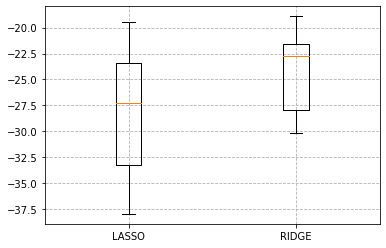

In [21]:
import matplotlib.pyplot as plt
labels=["LASSO", "RIDGE"]
plt.boxplot((lasso_scores, ridge_scores), labels=labels)
plt.grid(linestyle="--")
plt.show()

In [22]:
def rmse(predictions, targets):
    return np.sqrt(((predictions - targets) ** 2).mean())

In [23]:
from sklearn.linear_model import SGDRegressor
from sklearn.preprocessing import StandardScaler

std = StandardScaler()
std.fit(X)
X_scaled = std.transform(X)

eta0 = 0.01 
max_iter = 100

In [24]:
from sklearn.model_selection import train_test_split


X_train_dataset, X_test, y_train_dataset, y_test = train_test_split(
            X_scaled, y, test_size=0.2, random_state=42)

sgd_regressor = SGDRegressor(
    eta0=eta0, max_iter=max_iter, warm_start=True, learning_rate="constant")

rmse_val_score = []
rmse_train_score = []
model_list = []

X_train, X_val, y_train, y_val = train_test_split(
    X_train_dataset,y_train_dataset, test_size=0.2, random_state=42)
sgd_regressor.fit(X_train, y_train)

# kf = KFold(n_splits=100, shuffle=True)
# for train_index, test_index in kf.split(X_train_dataset):

for i in range(300):

    y_pred = sgd_regressor.predict(X_train)
    y_true = y_train
    rmse_train_score.append(rmse(y_pred, y_true))

    y_pred = sgd_regressor.predict(X_val)
    y_true = y_val
    rmse_val_score.append(rmse(y_pred, y_true))
    model_list.append(sgd_regressor)

    coef = sgd_regressor.coef_.copy()
    intercept = sgd_regressor.intercept_.copy()

    sgd_regressor = SGDRegressor(
        eta0=eta0, max_iter=max_iter, warm_start=True, learning_rate="constant")
    
    sgd_regressor.fit(X_train, y_train, coef_init=coef, intercept_init=intercept)    

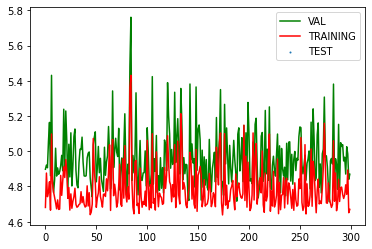

In [27]:
plt.plot(range(len(rmse_val_score)), rmse_val_score,  c="g", label="VAL")
plt.plot(range(len(rmse_train_score)), rmse_train_score,  c="r", label="TRAINING")
plt.scatter(99, rmse(y_test,sgd_regressor.predict(X_test)), s=1, label="TEST")
plt.legend()
plt.show()

In [28]:
np.argsort(rmse_val_score)

array([279, 188, 141, 153, 209, 140, 262,  46,  80, 236, 175,  91, 116,
       271, 231, 110,   8,  22, 163,  57, 112, 160,  73, 210, 287, 222,
        64, 260, 114,  76,  45,  32, 289, 159, 269, 155, 147, 278, 221,
       103,  26,  99, 157,  56,  31, 243, 106, 102, 180, 203, 174, 229,
       167, 183,  50, 194, 214, 201, 241, 173, 265,  95, 205,  85, 219,
       256,   9,  94, 238, 135, 298,   7,  55, 211, 202,  65, 284, 266,
        44, 169, 196,  24,  39, 226,  11, 234,  38,  40,   5, 111,  59,
        90,  13, 299, 104, 295, 132, 253, 217,  82, 137,  96,  87,  53,
        97, 187, 198, 215, 162,  14, 108, 191, 119,  17, 246,  30, 149,
       225,   0, 233, 164, 182,  74, 123,  51,  12,   2,  67, 115,  92,
        19, 235, 277,  15, 254, 223,  27,   1, 252, 139, 286, 208, 125,
       138,  81, 282, 270, 177, 257, 145,  79, 184, 128,  33,  60,  37,
       165, 293, 280, 126, 248, 143, 186, 158, 244, 258, 146, 285, 107,
       281, 192,  54, 247,  41,  75, 113, 136, 179, 294, 275, 15

In [29]:
rmse(y_test,sgd_regressor.predict(X_test))

4.953844109510973

In [31]:
rmse(y_test,model_list[279].predict(X_test))

4.747388218386841

In [33]:
model_list[279].coef_

array([-0.82606354,  1.08738159,  0.36382442,  0.98252849, -2.29087728,
        2.74184086, -0.16705525, -2.91522743,  2.0580596 , -1.36470329,
       -1.90833583,  1.08458445, -3.30304182])